In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv('./Indices/Opening_Difference.csv',index_col=0)
Data.head()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2008-01-15,-38.000000,-284.519532,-290.201171,-24.910156,-236.95996,-0.989990,-17.000000,0.380005,8.960010,17.550293
2008-01-16,-125.700196,-338.179687,-1597.820313,22.060059,163.71973,-21.830078,8.969971,-1.370011,-7.970019,-161.350098
2008-01-17,-74.899902,-200.350586,-426.029297,-178.120118,-300.69043,-58.479980,-34.469971,-2.429992,-24.629980,-127.049805
2008-01-18,0.000000,-18.879883,-457.910156,-31.629882,-9.75976,15.179931,-2.619995,0.449997,-27.135010,-30.200195
2008-01-21,-233.899902,123.929688,211.849609,-87.300293,-307.10938,-40.179931,-40.890015,-3.069993,-56.600000,-202.750000


In [3]:
Data.shape

(2619, 10)

## Splitting Data

Last 500 days would be Test data and rest of the data would be for training

In [4]:
Train = Data[:-500]
Test = Data[-500:]
Test.head()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2016-08-17,-8.099610,-282.400390,-12.580078,-51.610351,18.83008,28.299805,2.500000,0.310013,-0.765039,-30.450195
2016-08-18,2.399903,53.650390,51.179687,27.830078,-77.39063,-19.520020,-8.399902,-0.600006,1.364941,9.049804
2016-08-19,-20.800293,-91.529297,107.050781,-81.469727,29.44922,-1.989746,4.059814,0.339996,9.434961,45.450196
2016-08-22,18.100097,40.878907,-212.210937,0.150391,18.63086,3.419922,2.340088,-0.029998,6.679981,-27.299805
2016-08-23,-13.100097,-49.439453,-14.058594,-84.350586,-49.31054,1.589844,-2.659912,-0.050003,-8.450000,-38.650391


### Making Scratter Matrix

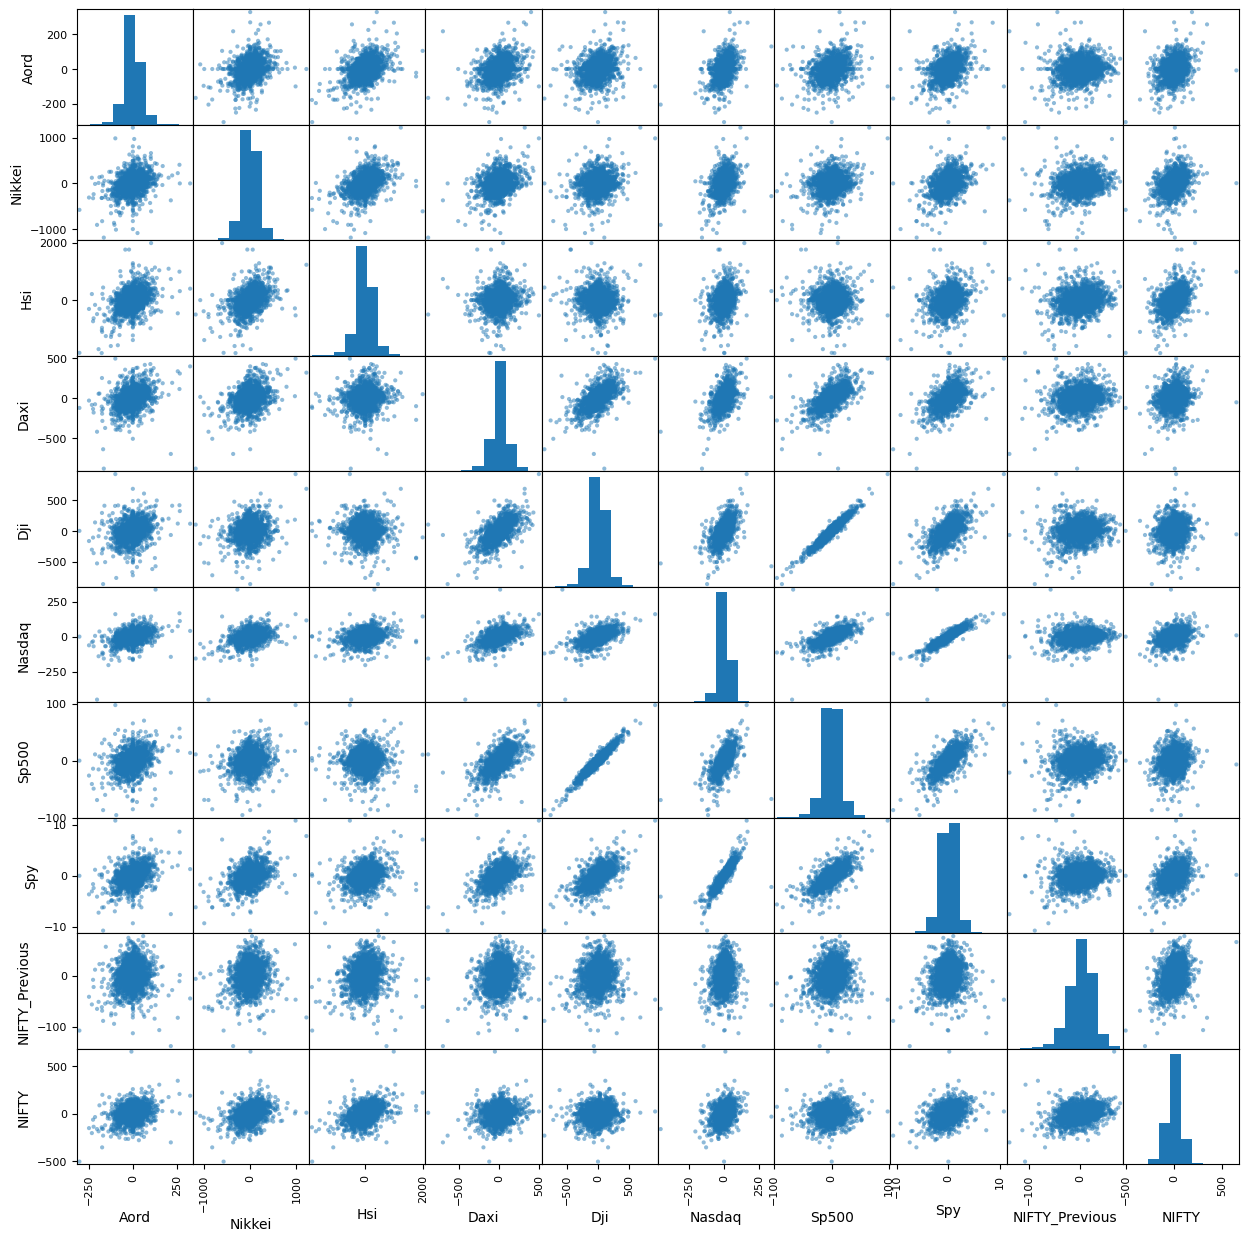

In [5]:
from pandas.plotting import scatter_matrix

SM = scatter_matrix(Train,figsize=(15,15))

<Axes: >

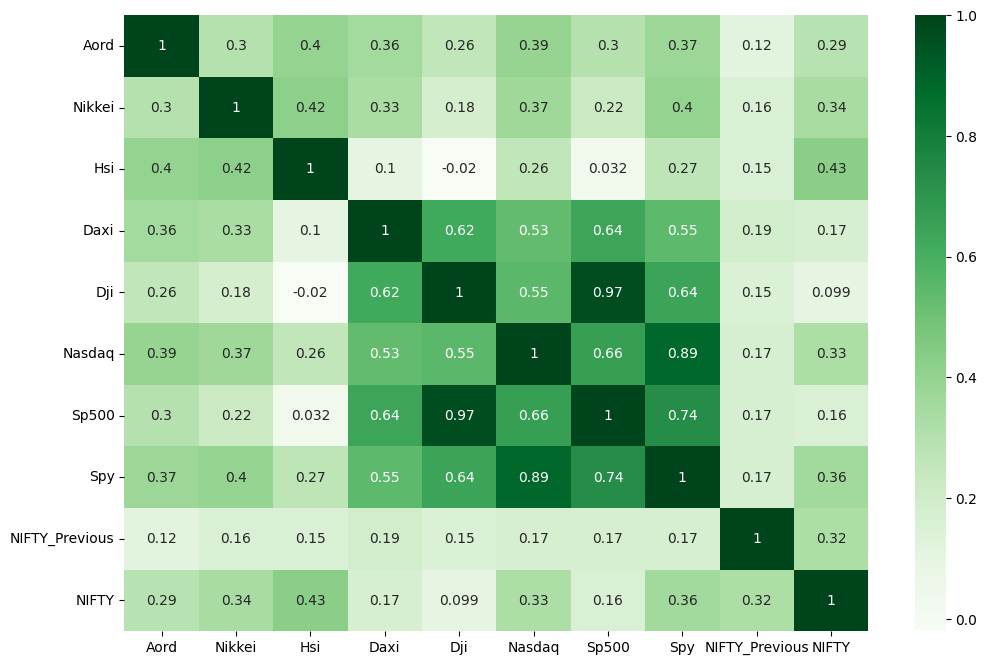

In [6]:
corMat = Train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corMat,cmap = 'Greens',annot=True)

## Making Model - Multiple Models

Used 2 Stats Model -> Ols and Gls

In [7]:
import statsmodels.formula.api as smf

In [8]:
for1 = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy+NIFTY_Previous'

In [9]:
Lm1 = smf.gls(formula=for1, data=Train).fit()
Lm2 = smf.ols(formula=for1, data=Train).fit()

In [12]:
Lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  NIFTY   R-squared:                       0.322
Model:                            GLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     111.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          9.05e-171
Time:                        13:33:00   Log-Likelihood:                -11793.
No. Observations:                2119   AIC:                         2.361e+04
Df Residuals:                    2109   BIC:                         2.366e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1550      1.379      0.112      0.911      -2.549       2.859
Aord               0.1062      0.032      3.284      0.001       0.043       0.170
Nikkei             0.0375      0.009      4.286      0.000       0.020       0.055
Hsi                0.0589      0.005     11.308      0.000       0.049       0.069
Daxi              -0.0144      0.018     -0.818      0.413      -0.049       0.020
Dji               -0.1059      0.043     -2.470      0.014      -0.190      -0.022
Nasdaq            -0.1140      0.079     -1.443      0.149      -0.269       0.041
Sp500              0.2802      0.427      0.657      0.511      -0.556       1.117
Spy               15.9079      2.091      7.607      0.000      11.807      20.009
NIFTY_Previous     0.7569      0.059     12.847      0.000       0.641       0.872
==============================================================================
Omnibus:                      270.439   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.520
Skew:                           0.438   Prob(JB):                         0.00
Kurtosis:                       7.181   Cond. No.                         509.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
Lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  NIFTY   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     111.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          9.05e-171
Time:                        13:33:00   Log-Likelihood:                -11793.
No. Observations:                2119   AIC:                         2.361e+04
Df Residuals:                    2109   BIC:                         2.366e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1550      1.379      0.112      0.911      -2.549       2.859
Aord               0.1062      0.032      3.284      0.001       0.043       0.170
Nikkei             0.0375      0.009      4.286      0.000       0.020       0.055
Hsi                0.0589      0.005     11.308      0.000       0.049       0.069
Daxi              -0.0144      0.018     -0.818      0.413      -0.049       0.020
Dji               -0.1059      0.043     -2.470      0.014      -0.190      -0.022
Nasdaq            -0.1140      0.079     -1.443      0.149      -0.269       0.041
Sp500              0.2802      0.427      0.657      0.511      -0.556       1.117
Spy               15.9079      2.091      7.607      0.000      11.807      20.009
NIFTY_Previous     0.7569      0.059     12.847      0.000       0.641       0.872
==============================================================================
Omnibus:                      270.439   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.520
Skew:                           0.438   Prob(JB):                         0.00
Kurtosis:                       7.181   Cond. No.                         509.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making Predection

In [14]:
Train_res = pd.DataFrame(index=Train.index)
Train_res['NIFTY'] = Train['NIFTY']

Train_res['Pre1'] = Lm1.predict(Train)
Train_res['Pre2'] = Lm2.predict(Train)

#### Plotting Predection WRT Nifty

Text(0.5, 1.0, 'Nifty vs OLS Predection')

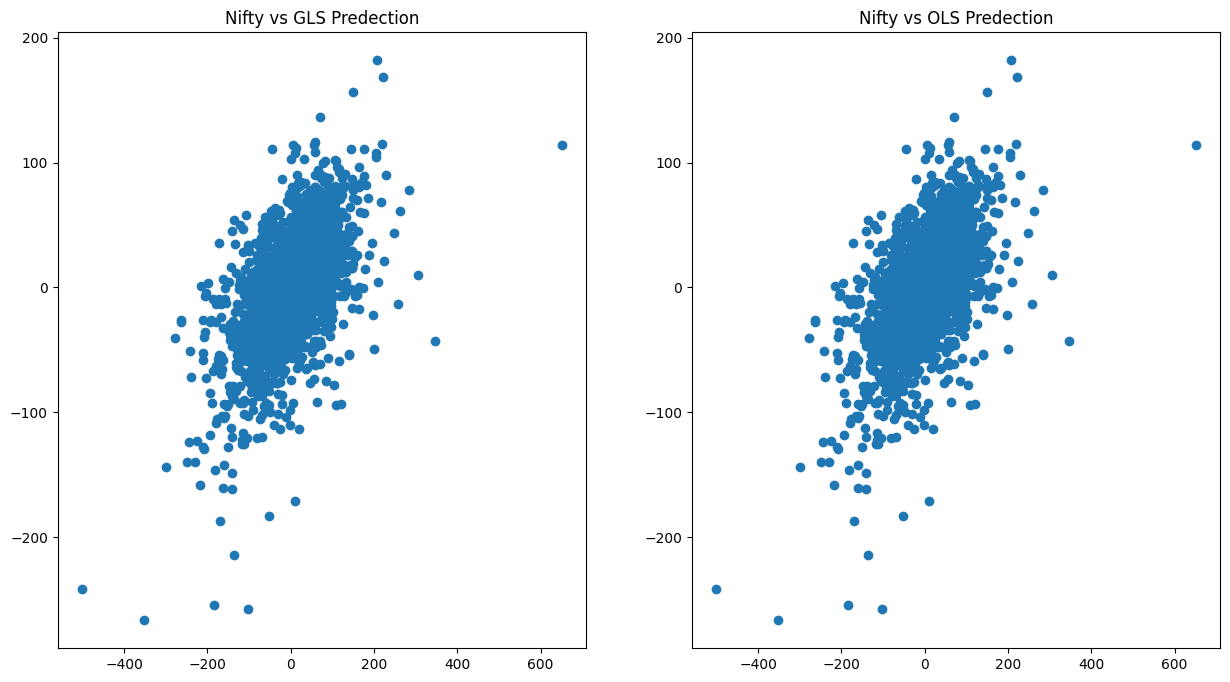

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(Train_res['NIFTY'],Train_res['Pre1'])
plt.title("Nifty vs GLS Predection")

plt.subplot(1,2,2)
plt.scatter(Train_res['NIFTY'],Train_res['Pre1'])
plt.title("Nifty vs OLS Predection")

Differences in the Predections

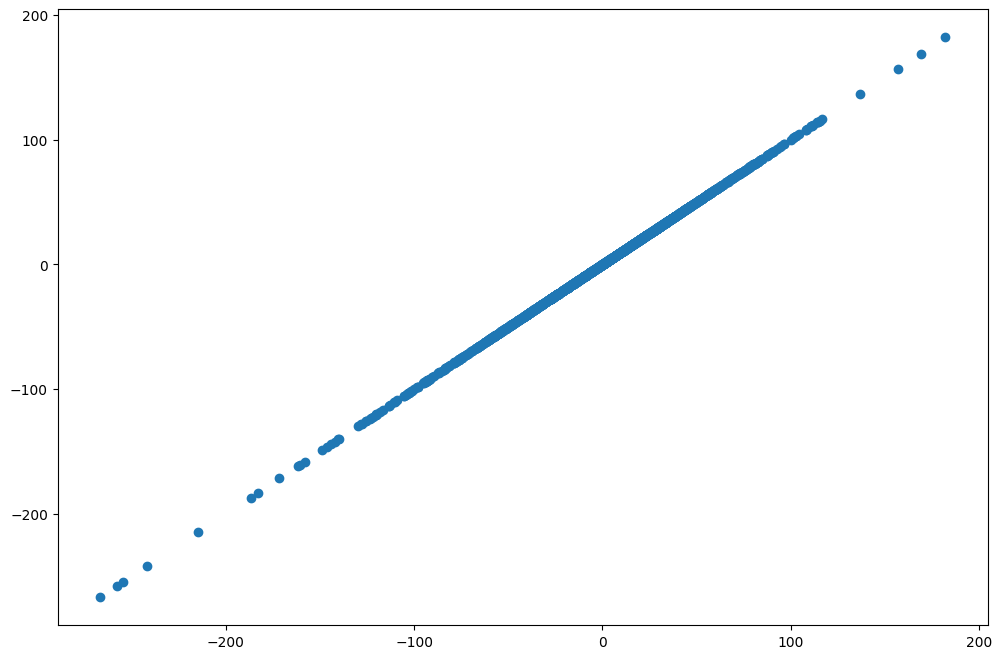

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(Train_res['Pre1'],Train_res['Pre2'])

On Training Data They are Exactly Same

#### Predections

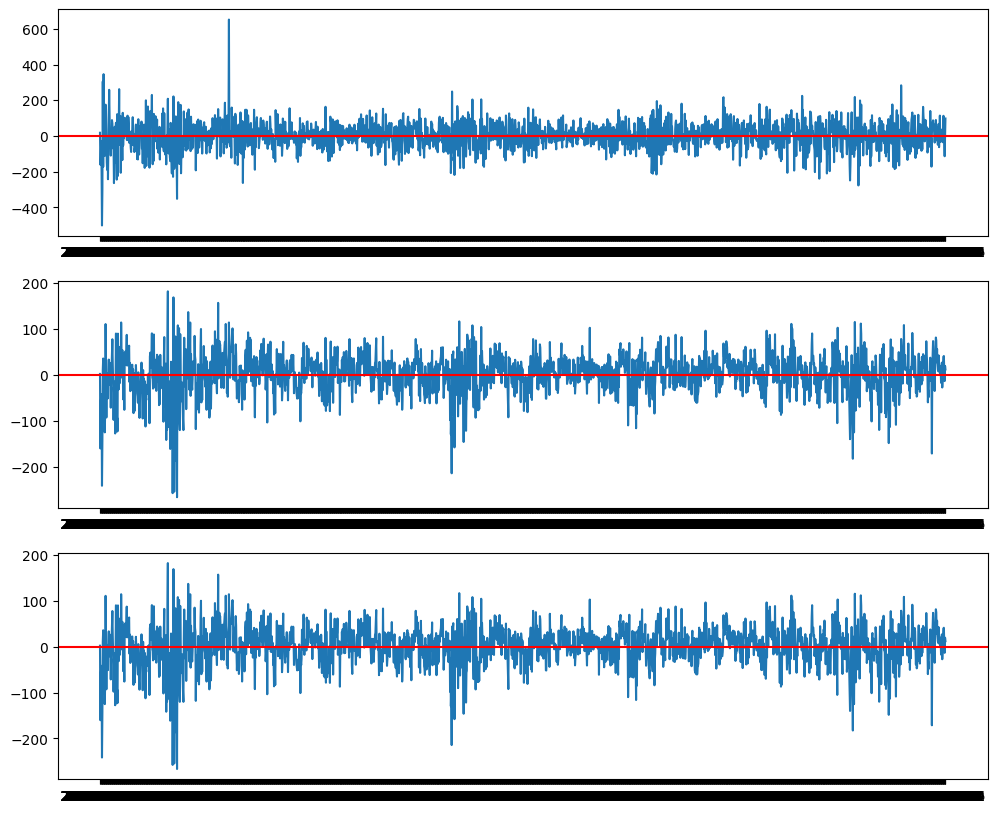

In [16]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.plot(Train_res.index,Train_res['NIFTY'],label='Nifty')
plt.axhline(y=0,c='r')
plt.subplot(3,1,2)
plt.plot(Train_res.index,Train_res['Pre1'],label='P1')
plt.axhline(y=0,c='r')
plt.subplot(3,1,3)
plt.plot(Train_res.index,Train_res['Pre2'],label='P2')
plt.axhline(y=0,c='r')
# plt.legend()
plt.show()

Plotting  the Differences

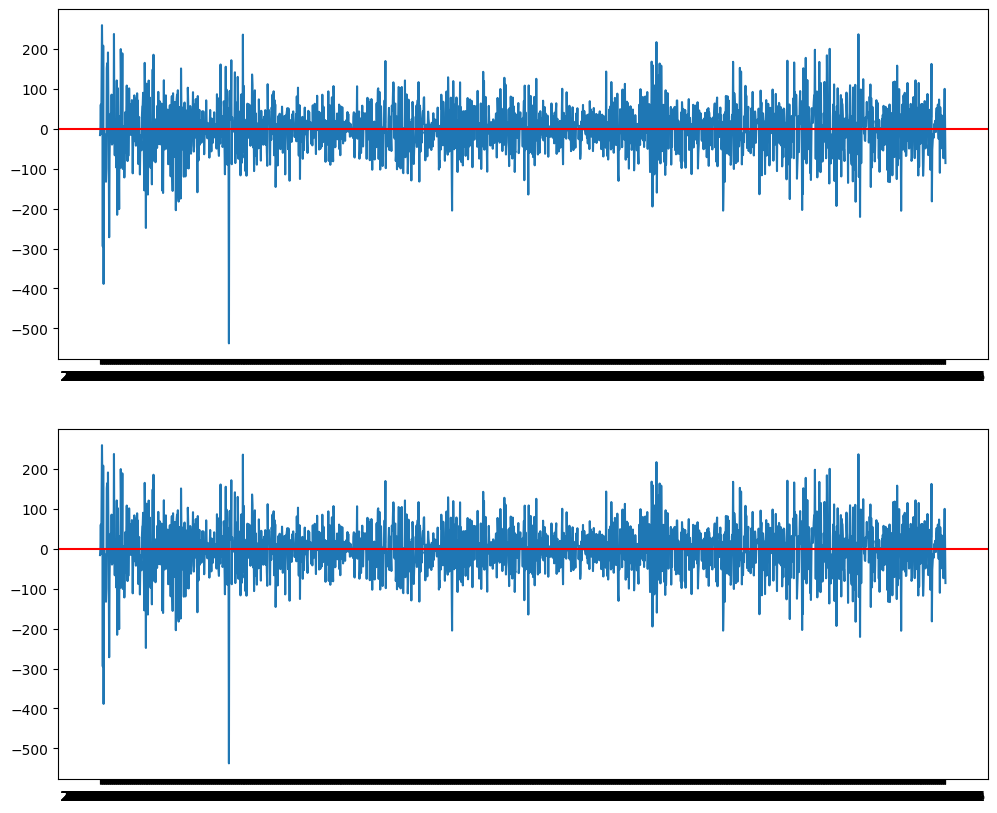

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
plt.plot(Train_res.index,Train_res['Pre1'] - Train_res['NIFTY'])
plt.axhline(y=0, c='r')
plt.subplot(2,1,1)
plt.plot(Train_res.index,Train_res['Pre2'] - Train_res['NIFTY'])
plt.axhline(y=0, c='r')
plt.show()

In [19]:
Train_res.describe()

,NIFTY,Pre1,Pre2
count,2119.000000,2119.000000,2119.000000
mean,1.161609,1.161609,1.161609
std,76.755940,43.542472,43.542472
min,-501.649902,-266.700671,-266.700671
25%,-41.000000,-20.709786,-20.709786
50%,2.099610,4.041963,4.041963
75%,48.500000,26.602720,26.602720
max,651.800293,182.047286,182.047286


Need To Calculate RMSE for both of the models

### Model Performance in Test Data

### Infrence -> Restructure
Both the model are almost produce the same result

## Making Models - Multiple Formulas

Using 2 Formulas for the Model training

In [20]:
# Formula 1 we will use the Nifty Previous day also
for1 = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy+NIFTY_Previous'
# Formula 2 we will not use the Nifty Previous day also
for2 = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy'

In [21]:
Lm1 = smf.ols(formula=for1, data=Train).fit()
Lm2 = smf.ols(formula=for2, data= Train).fit()

In [22]:
# For Test purpose
# from sklearn.matrices import rmse

def rmse (col1,col2):
    rmse = np.sqrt(np.mean((col1 - col2) ** 2))
    print(rmse)

In [24]:
rmse(Train_res['NIFTY'], Train_res['Pre2'])

63.195267399306836
